In [7]:
import pandas as pd
import os

# Path where your 4 text files are stored
data_folder = r"C:\Users\aligi\OneDrive\Documents\Desktop\Turbo Fan Engines"

# New output folder where combined CSV will be saved
output_path = r"C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData"

# Create output folder if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Define column names
columns = [
    'unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3',
    'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5',
    'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10',
    'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15',
    'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20',
    'sensor_measurement_21'
]

# Files info with offset
files_info = {
    "FD001": {"file": "train_FD001.txt", "offset": 0},
    "FD002": {"file": "train_FD002.txt", "offset": 100},
    "FD003": {"file": "train_FD003.txt", "offset": 360},
    "FD004": {"file": "train_FD004.txt", "offset": 460},
}

# Read, process, combine all datasets
df_list = []

for dataset, info in files_info.items():
    file_path = os.path.join(data_folder, info["file"])
    df = pd.read_csv(file_path, sep=r'\s+', header=None)  # raw string for separator regex
    df.columns = columns
    df["unit_number"] += info["offset"]
    df["dataset"] = dataset
    df.dropna(inplace=True)
    df_list.append(df)

# Combine into one dataframe
combined_df = pd.concat(df_list, ignore_index=True)

# Save combined CSV
combined_csv_path = os.path.join(output_path, "combined_turbo_fan_data.csv")
combined_df.to_csv(combined_csv_path, index=False)
print(f"Combined CSV saved at: {combined_csv_path}")


Combined CSV saved at: C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData\combined_turbo_fan_data.csv


In [9]:
import pandas as pd
import os

# Paths
data_folder = r"C:\Users\aligi\OneDrive\Documents\Desktop\Turbo Fan Engines"
output_path = r"C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData"
os.makedirs(output_path, exist_ok=True)

columns = [
    'unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3',
    'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5',
    'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10',
    'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15',
    'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20',
    'sensor_measurement_21'
]

files_info = {
    "FD001": {"file": "train_FD001.txt", "offset": 0},
    "FD002": {"file": "train_FD002.txt", "offset": 100},
    "FD003": {"file": "train_FD003.txt", "offset": 360},
    "FD004": {"file": "train_FD004.txt", "offset": 460},
}

df_list = []

for dataset, info in files_info.items():
    file_path = os.path.join(data_folder, info["file"])
    df = pd.read_csv(file_path, sep=r'\s+', header=None)
    df.columns = columns
    df["unit_number"] += info["offset"]
    df["dataset"] = dataset

    # Convert operational and sensor columns to float
    float_cols = columns[2:]  # all columns except first two (unit_number, time_in_cycles)
    df[float_cols] = df[float_cols].astype(float)

    # Keep unit_number and time_in_cycles as int
    df['unit_number'] = df['unit_number'].astype(int)
    df['time_in_cycles'] = df['time_in_cycles'].astype(int)

    df.dropna(inplace=True)

    # Calculate RUL per unit_number
    max_cycles = df.groupby('unit_number')['time_in_cycles'].transform('max')
    df['RUL'] = max_cycles - df['time_in_cycles']

    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

combined_csv_path = os.path.join(output_path, "combined_turbo_fan_data_with_RUL.csv")
combined_df.to_csv(combined_csv_path, index=False)
print(f"Combined CSV saved at: {combined_csv_path}")


Combined CSV saved at: C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData\combined_turbo_fan_data_with_RUL.csv


Columns: ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20', 'sensor_measurement_21', 'dataset', 'RUL']
   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1              

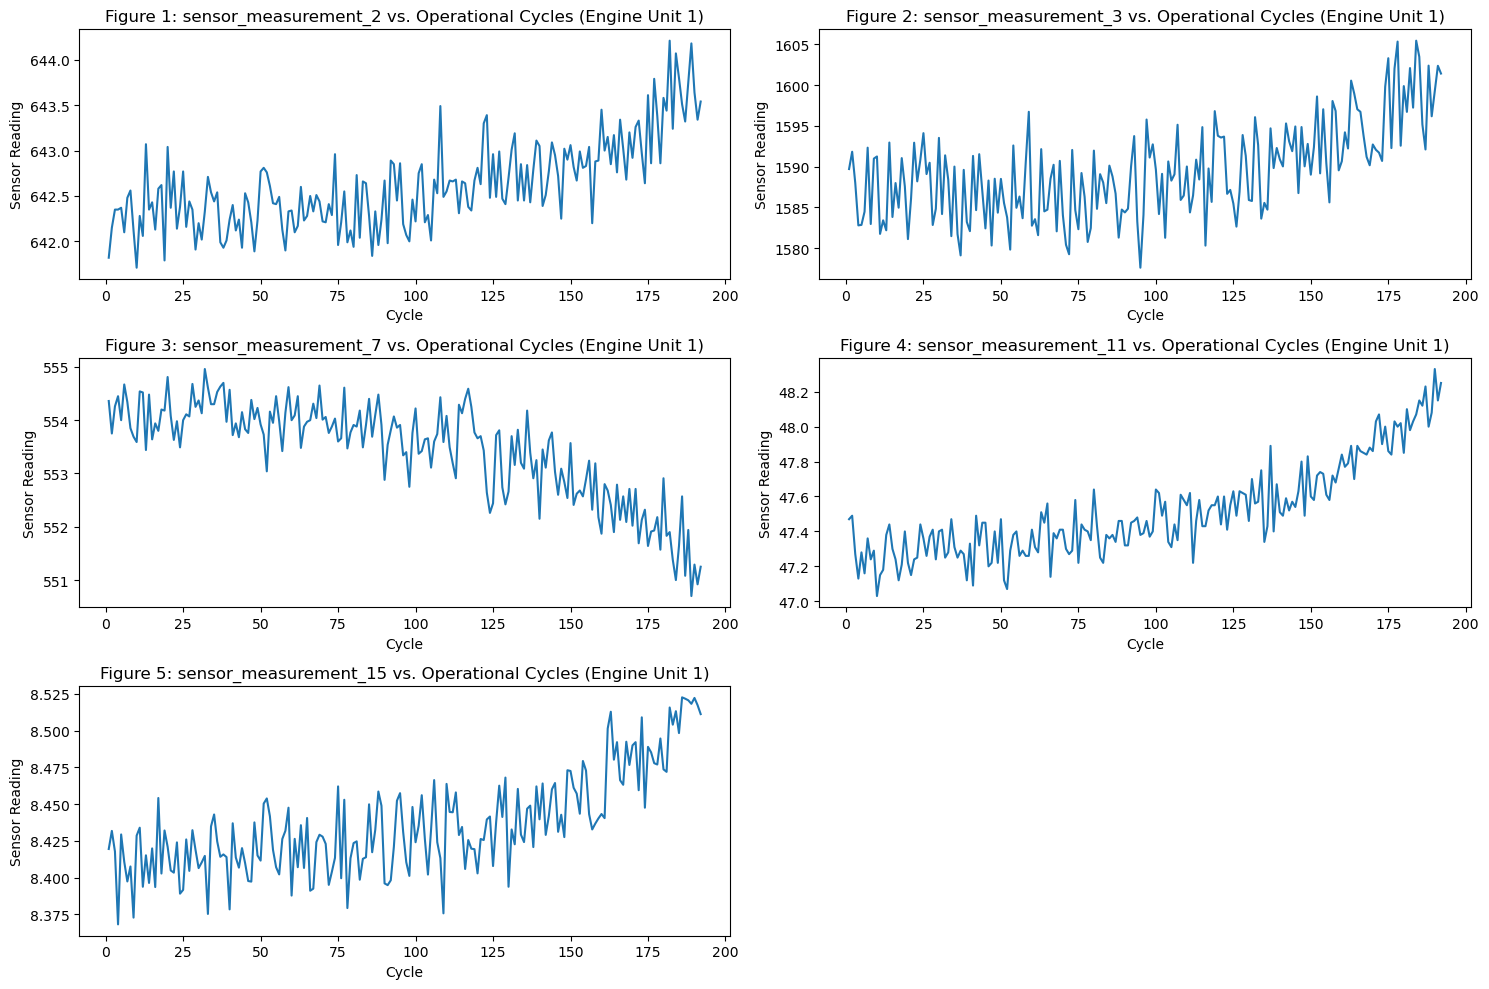

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData\combined_turbo_fan_data_with_RUL.csv'
df = pd.read_csv(file_path)

# Preview data structure to verify column names (optional)
print("Columns:", df.columns.tolist())
print(df.head())

# Select the first engine unit
engine_id = df['unit_number'].unique()[0]
engine_df = df[df['unit_number'] == engine_id]

# Choose 5 meaningful sensors (based on degradation pattern)
selected_sensors = [
    'sensor_measurement_2',
    'sensor_measurement_3',
    'sensor_measurement_7',
    'sensor_measurement_11',
    'sensor_measurement_15'
]

# Plot and caption each sensor’s trend over time
plt.figure(figsize=(15, 10))
for i, sensor in enumerate(selected_sensors):
    plt.subplot(3, 2, i + 1)
    sns.lineplot(data=engine_df, x='time_in_cycles', y=sensor)
    plt.title(f'Figure {i+1}: {sensor} vs. Operational Cycles (Engine Unit {engine_id})')
    plt.xlabel('Cycle')
    plt.ylabel('Sensor Reading')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData\combined_turbo_fan_data_with_RUL.csv")

# Preview to confirm correct column names
print(df.columns)


In [4]:
# Sort for correct rolling application
df = df.sort_values(by=['unit_number', 'time_in_cycles'])

# Define sensors of interest
sensors = ['sensor_measurement_3', 'sensor_measurement_7', 'sensor_measurement_11', 'sensor_measurement_15']

# Compute rolling stats (window size = 5 cycles)
for sensor in sensors:
    df[f'{sensor}_rolling_mean'] = df.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    df[f'{sensor}_rolling_std'] = df.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window=5, min_periods=1).std())


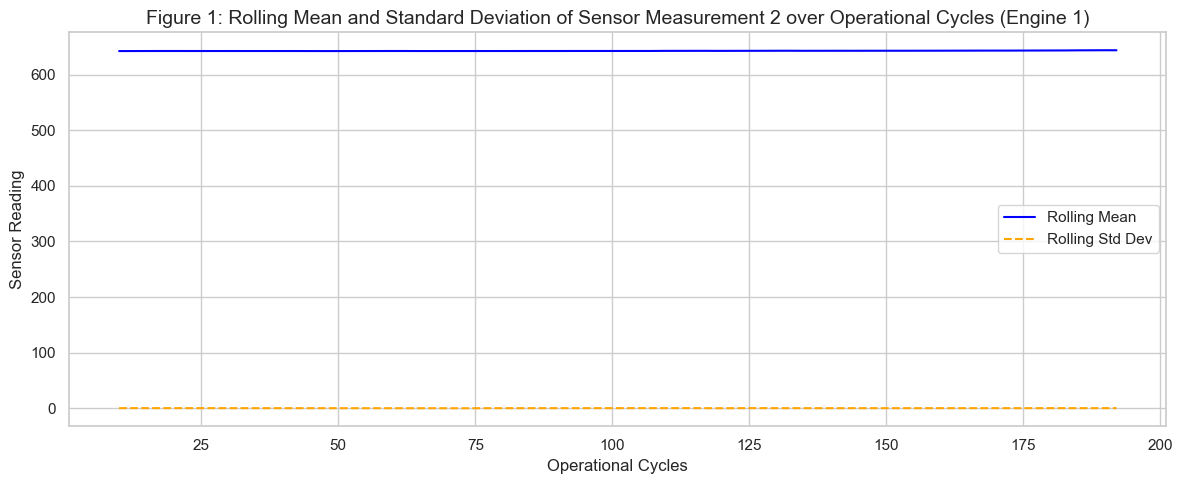

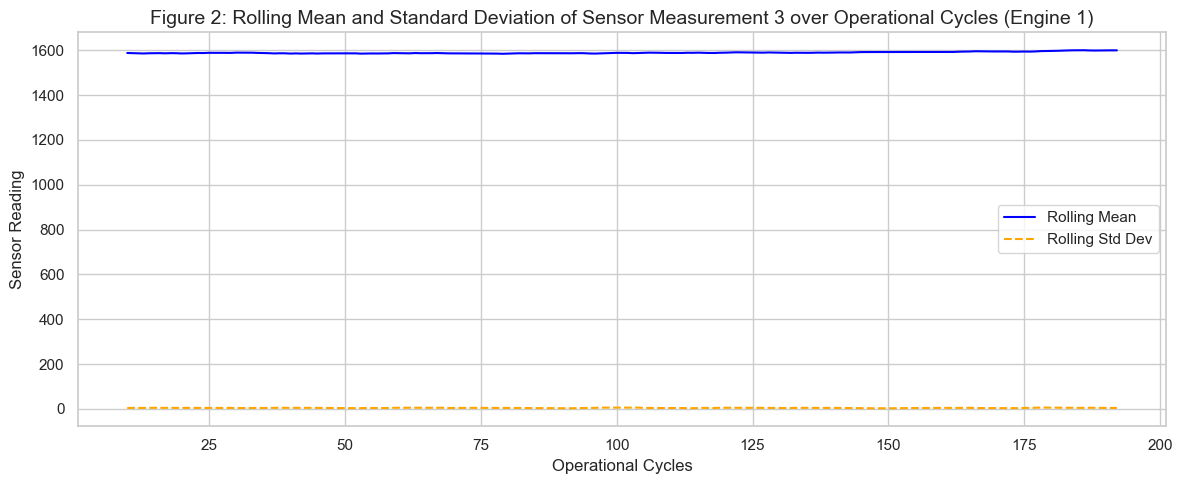

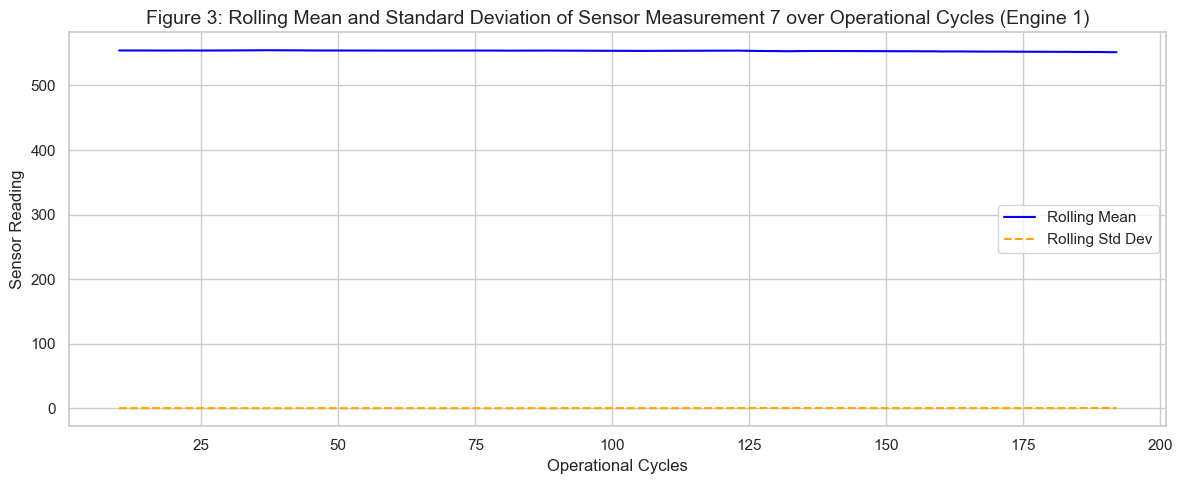

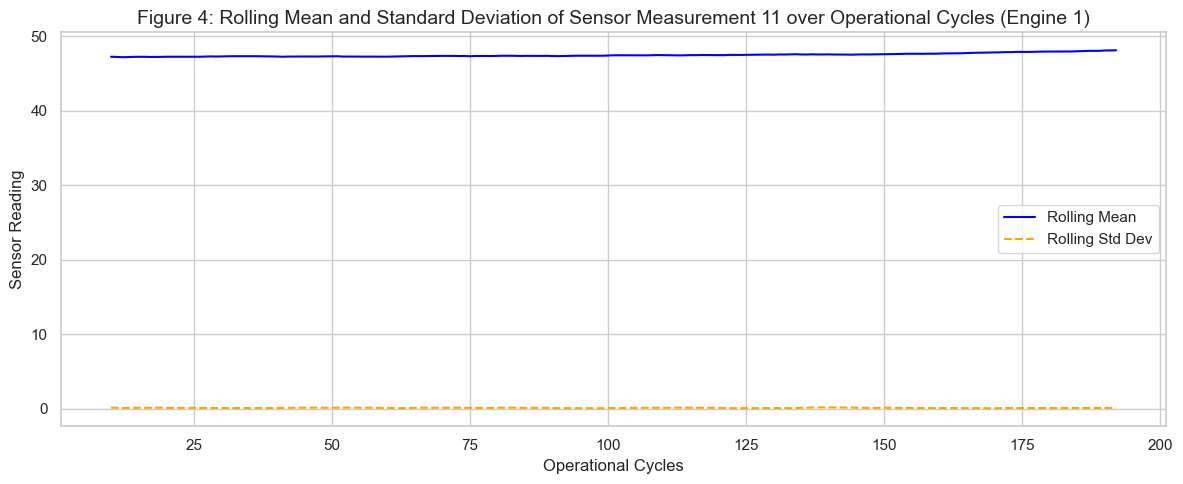

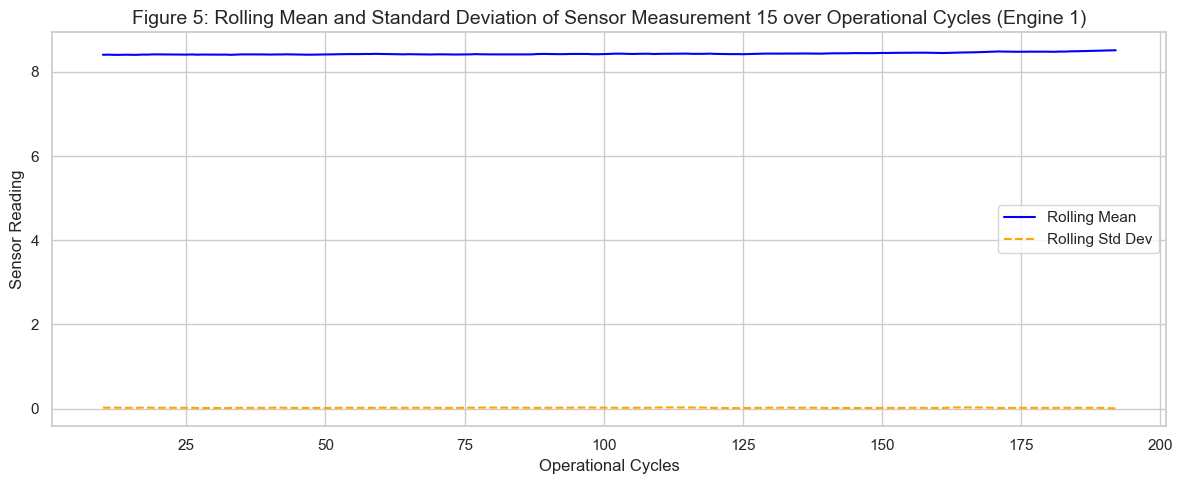

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData\combined_turbo_fan_data_with_RUL.csv"
df = pd.read_csv(file_path)

# Filter for one engine unit (e.g., unit_number = 1)
engine_df = df[df['unit_number'] == 1].copy()

# Set plot style
sns.set(style="whitegrid")

# Define the sensor list
sensors = ['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_7', 
           'sensor_measurement_11', 'sensor_measurement_15']

# Define rolling window size
window_size = 10

# Calculate rolling mean and std for each sensor
for sensor in sensors:
    engine_df[f'{sensor}_rolling_mean'] = engine_df[sensor].rolling(window=window_size).mean()
    engine_df[f'{sensor}_rolling_std'] = engine_df[sensor].rolling(window=window_size).std()

# Plot each sensor’s rolling stats
for i, sensor in enumerate(sensors, start=1):
    plt.figure(figsize=(12, 5))
    plt.plot(engine_df['time_in_cycles'], engine_df[f'{sensor}_rolling_mean'], label='Rolling Mean', color='blue')
    plt.plot(engine_df['time_in_cycles'], engine_df[f'{sensor}_rolling_std'], label='Rolling Std Dev', linestyle='--', color='orange')
    
    # Improved figure title (caption style)
    plt.title(f'Figure {i}: Rolling Mean and Standard Deviation of {sensor.replace("_", " ").title()} over Operational Cycles (Engine 1)', fontsize=14)
    
    plt.xlabel('Operational Cycles', fontsize=12)
    plt.ylabel('Sensor Reading', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()




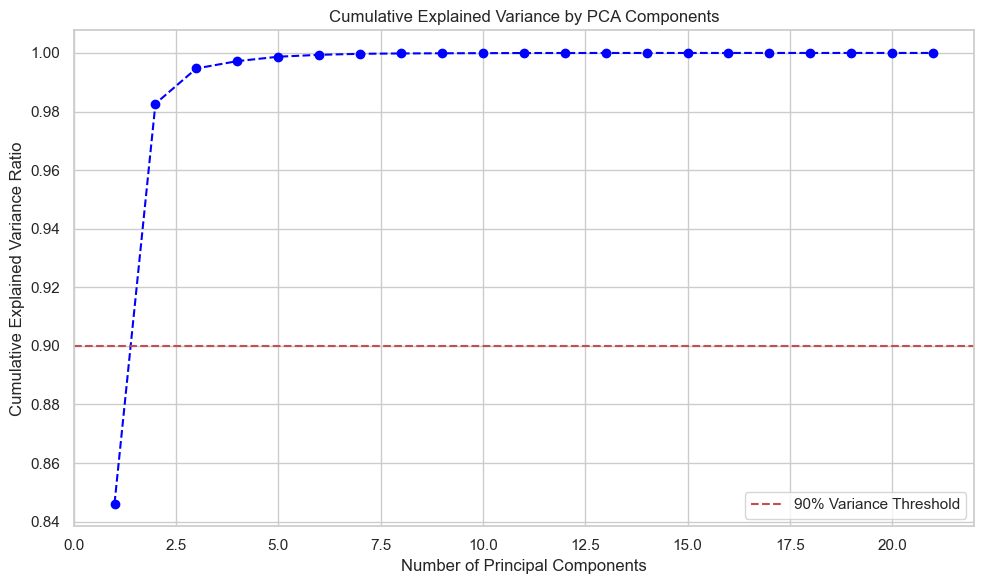

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData\combined_turbo_fan_data_with_RUL.csv"
df = pd.read_csv(file_path)

# Select only sensor measurements (exclude ID/time/RUL etc.)
sensor_cols = [col for col in df.columns if 'sensor_measurement' in col]
sensor_data = df[sensor_cols]

# Drop rows with NaNs (if rolling means or std were added earlier)
sensor_data = sensor_data.dropna()

# Standardize the sensor data
scaler = StandardScaler()
sensor_scaled = scaler.fit_transform(sensor_data)

# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(sensor_scaled)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--', color='blue')

plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()



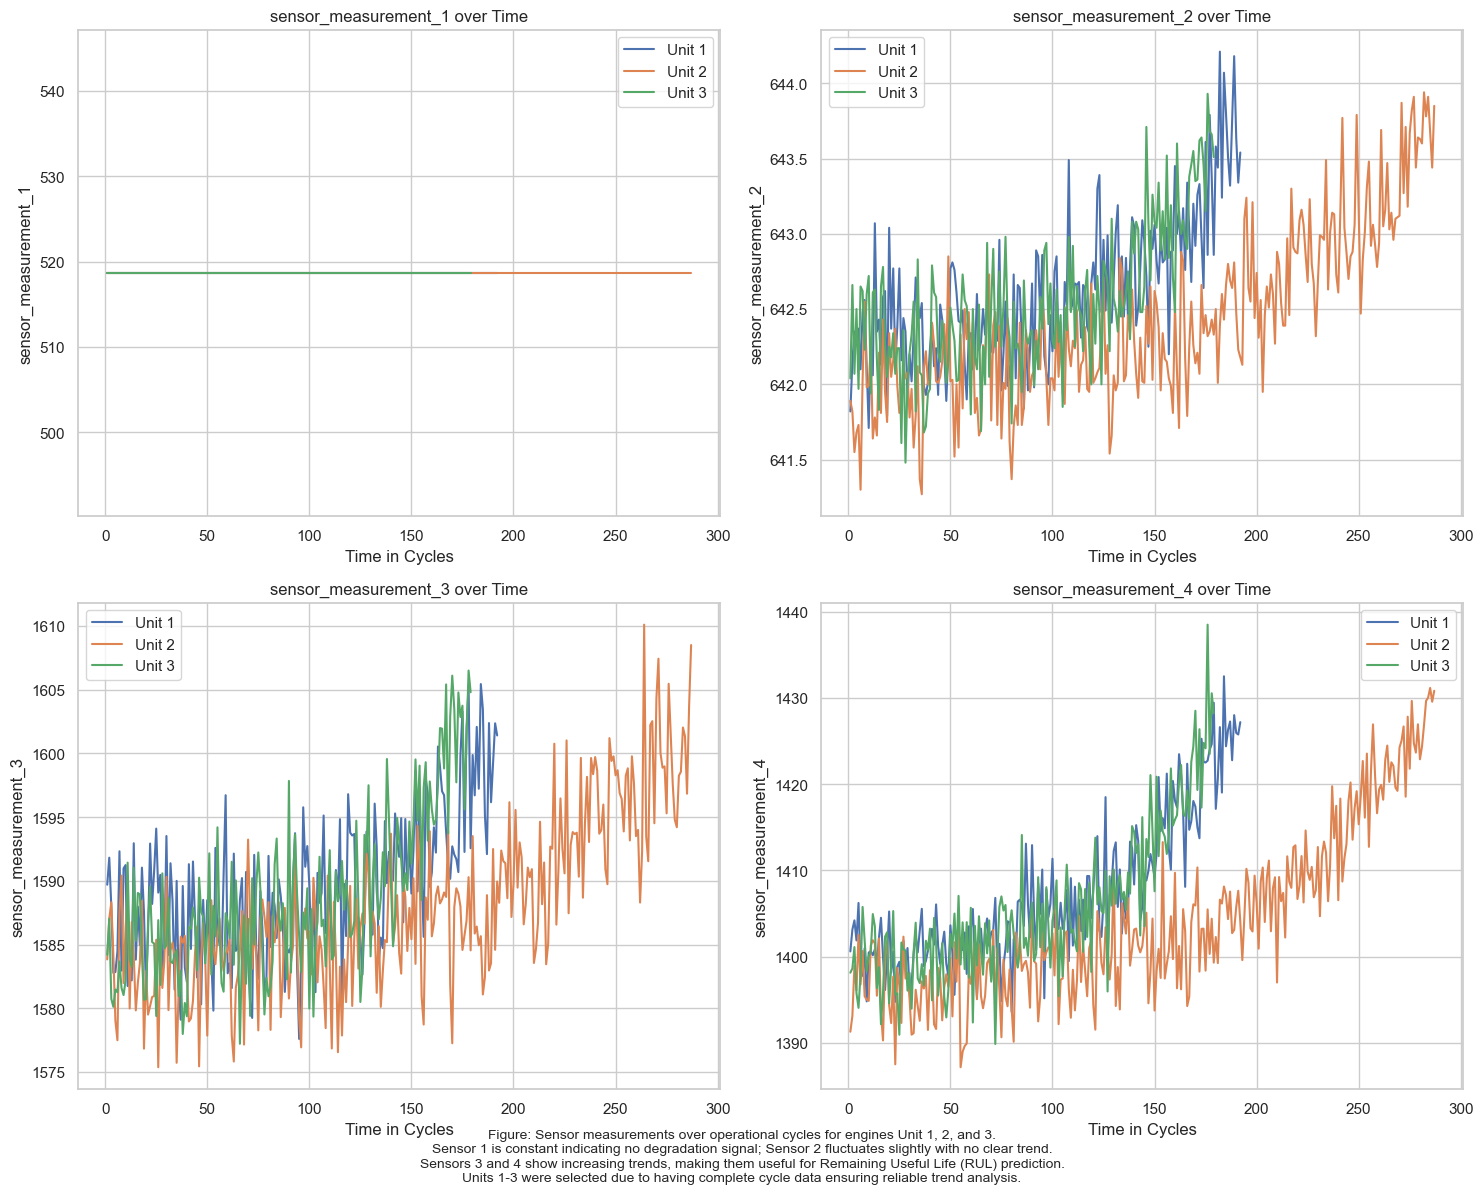

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData\combined_turbo_fan_data_with_RUL.csv")

engine_id_col = 'unit_number'
time_col = 'time_in_cycles'

# Sensors to plot
sensor_columns = [
    'sensor_measurement_1', 
    'sensor_measurement_2', 
    'sensor_measurement_3', 
    'sensor_measurement_4'
]

# Select first 3 engine units to ensure full life cycle data
engine_ids = df[engine_id_col].unique()[:3]

plt.figure(figsize=(15, 12))

for i, sensor in enumerate(sensor_columns):
    plt.subplot(2, 2, i + 1)
    for engine_id in engine_ids:
        engine_df = df[df[engine_id_col] == engine_id]
        plt.plot(engine_df[time_col], engine_df[sensor], label=f'Unit {engine_id}')
    plt.title(f'{sensor} over Time')
    plt.xlabel('Time in Cycles')
    plt.ylabel(sensor)
    plt.legend()

# Add a clear caption below all subplots (adjust coordinates if needed)
plt.figtext(0.5, 0.01, 
            "Figure: Sensor measurements over operational cycles for engines Unit 1, 2, and 3.\n"
            "Sensor 1 is constant indicating no degradation signal; Sensor 2 fluctuates slightly with no clear trend.\n"
            "Sensors 3 and 4 show increasing trends, making them useful for Remaining Useful Life (RUL) prediction.\n"
            "Units 1-3 were selected due to having complete cycle data ensuring reliable trend analysis.",
            wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 1])  # Make space for the caption
plt.show()


In [24]:
import pandas as pd

df = pd.read_csv(r"C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData\combined_turbo_fan_data_with_RUL.csv")

sensor_columns = [f'sensor_measurement_{i}' for i in range(1, 22)]
window_size = 5

for sensor in sensor_columns:
    df[f'{sensor}_rolling_mean'] = df.groupby('unit_number')[sensor].rolling(window=window_size, min_periods=1).mean().reset_index(level=0, drop=True)
    df[f'{sensor}_rolling_std'] = df.groupby('unit_number')[sensor].rolling(window=window_size, min_periods=1).std().reset_index(level=0, drop=True)
    df[f'{sensor}_rolling_min'] = df.groupby('unit_number')[sensor].rolling(window=window_size, min_periods=1).min().reset_index(level=0, drop=True)
    df[f'{sensor}_rolling_max'] = df.groupby('unit_number')[sensor].rolling(window=window_size, min_periods=1).max().reset_index(level=0, drop=True)
    
    # Use transform for EMA to keep index aligned
    df[f'{sensor}_ema'] = df.groupby('unit_number')[sensor].transform(lambda x: x.ewm(span=window_size, adjust=False).mean())

print(df.head())



C:\Users\aligi\AppData\Local\Temp\ipykernel_12812\1022307060.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{sensor}_rolling_min'] = df.groupby('unit_number')[sensor].rolling(window=window_size, min_periods=1).min().reset_index(level=0, drop=True)
C:\Users\aligi\AppData\Local\Temp\ipykernel_12812\1022307060.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{sensor}_rolling_max'] = df.groupby('unit_number')[sensor].rolling(window=window_size, min_periods=1).max().reset_index(level=0, drop=True)
C:\Users\aligi\A

   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                    100                518.67                641.82   
1                    100                518.67                642.15   
2                    100                518.67                642.35   
3                    100                518.67                642.35   
4                    100                518.67                642.37   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
0         

C:\Users\aligi\AppData\Local\Temp\ipykernel_12812\1022307060.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{sensor}_ema'] = df.groupby('unit_number')[sensor].transform(lambda x: x.ewm(span=window_size, adjust=False).mean())


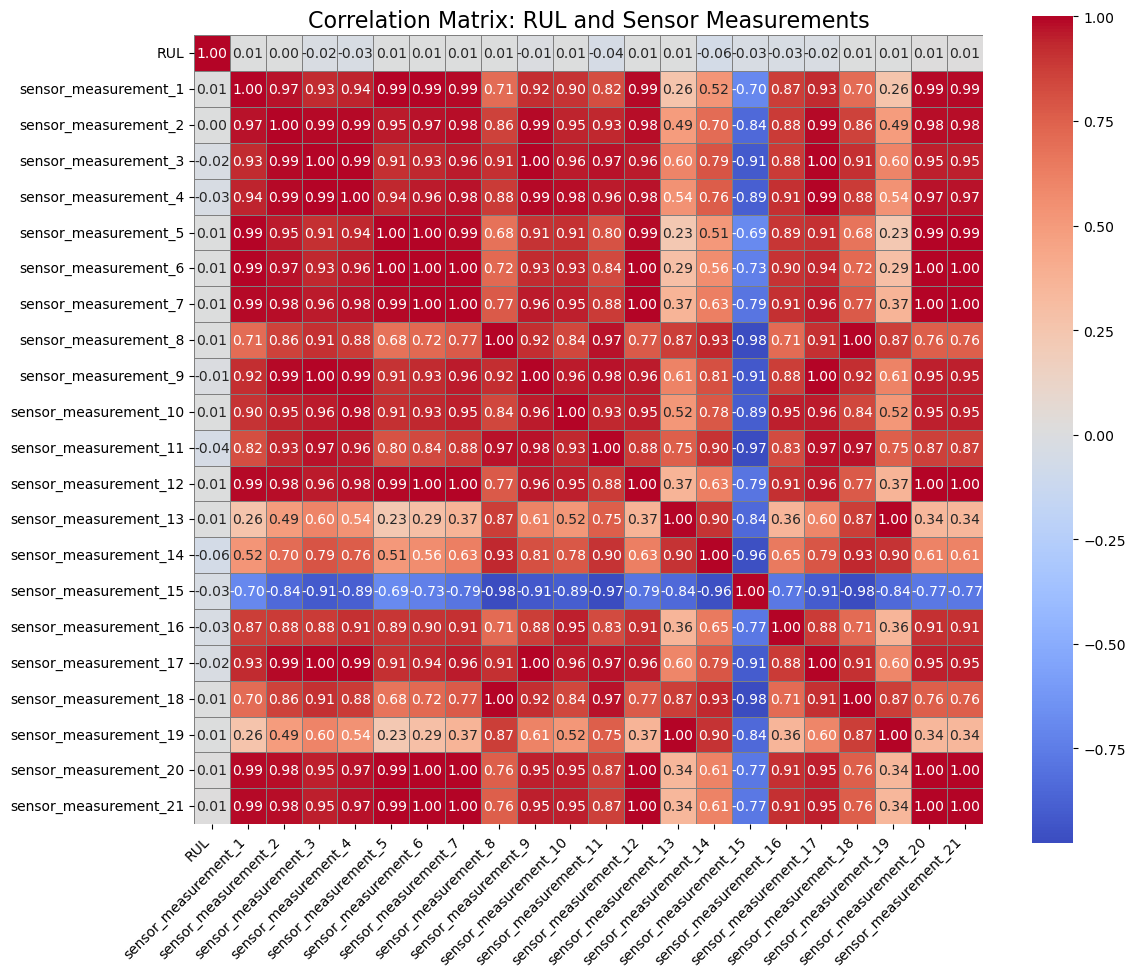

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData\combined_turbo_fan_data_with_RUL.csv")

# Select sensor columns and RUL
sensor_cols = [f'sensor_measurement_{i}' for i in range(1, 22)]
cols_to_use = ['RUL'] + sensor_cols

# Compute correlation matrix for RUL and sensors
corr_matrix = df[cols_to_use].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            square=True, linewidths=0.5, linecolor='gray')

plt.title('Correlation Matrix: RUL and Sensor Measurements', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


In [3]:
import pandas as pd
import os

# Paths
data_folder = r"C:\Users\aligi\OneDrive\Documents\Desktop\Turbo Fan Engines"
output_path = r"C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData"
os.makedirs(output_path, exist_ok=True)

columns = [
    'unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3',
    'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5',
    'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10',
    'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15',
    'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20',
    'sensor_measurement_21'
]

files_info = {
    "FD001": {"file": "train_FD001.txt", "offset": 0},
    "FD002": {"file": "train_FD002.txt", "offset": 100},
    "FD003": {"file": "train_FD003.txt", "offset": 360},
    "FD004": {"file": "train_FD004.txt", "offset": 460},
}

df_list = []

for dataset, info in files_info.items():
    file_path = os.path.join(data_folder, info["file"])
    df = pd.read_csv(file_path, sep=r'\s+', header=None)
    df.columns = columns
    df["unit_number"] += info["offset"]
    df["dataset"] = dataset

    # Convert operational and sensor columns to float
    float_cols = columns[2:]  # all columns except first two (unit_number, time_in_cycles)
    df[float_cols] = df[float_cols].astype(float)

    # Keep unit_number and time_in_cycles as int
    df['unit_number'] = df['unit_number'].astype(int)
    df['time_in_cycles'] = df['time_in_cycles'].astype(int)

    df.dropna(inplace=True)

    # Calculate RUL per unit_number
    max_cycles = df.groupby('unit_number')['time_in_cycles'].transform('max')
    df['RUL'] = max_cycles - df['time_in_cycles']

    # Create binary failure label (1 if RUL <= 30, else 0)
    failure_threshold = 30
    df['Failure'] = (df['RUL'] <= failure_threshold).astype(int)

    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

combined_csv_path = os.path.join(output_path, "combined_turbo_fan_data_with_RUL_and_Failure.csv")
combined_df.to_csv(combined_csv_path, index=False)
print(f"Combined CSV with binary failure label saved at: {combined_csv_path}")


Combined CSV with binary failure label saved at: C:\Users\aligi\OneDrive\Documents\Desktop\CombinedData\combined_turbo_fan_data_with_RUL_and_Failure.csv


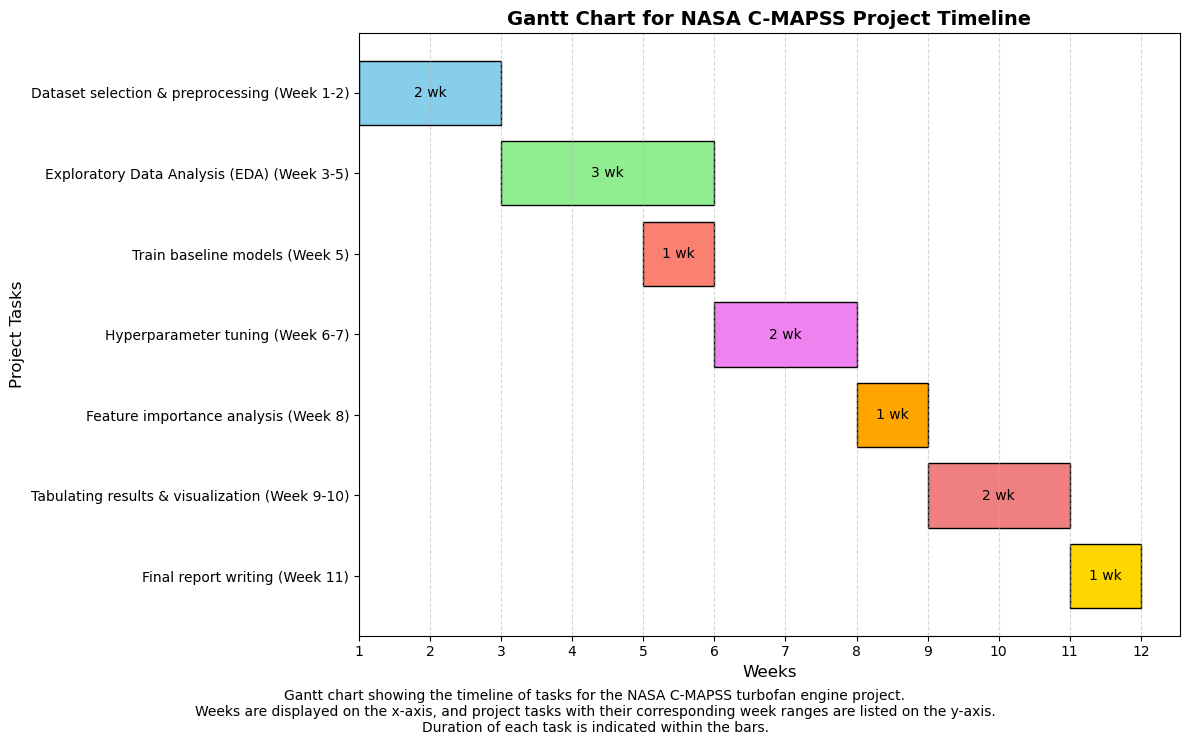

In [7]:
import matplotlib.pyplot as plt

# Task names
tasks = [
    "Dataset selection & preprocessing",
    "Exploratory Data Analysis (EDA)",
    "Train baseline models",
    "Hyperparameter tuning",
    "Feature importance analysis",
    "Tabulating results & visualization",
    "Final report writing"
]

# Week ranges for each task
week_ranges = [
    "(Week 1-2)",
    "(Week 3-5)",
    "(Week 5)",
    "(Week 6-7)",
    "(Week 8)",
    "(Week 9-10)",
    "(Week 11)"
]

# Combine task names with week ranges for y-axis labels
y_labels = [f"{task} {week}" for task, week in zip(tasks, week_ranges)]

# Start weeks of each task
start_weeks = [1, 3, 5, 6, 8, 9, 11]

# Duration in weeks
durations = [2, 3, 1, 2, 1, 2, 1]

# Colors for tasks
colors = ['skyblue', 'lightgreen', 'salmon', 'violet', 'orange', 'lightcoral', 'gold']

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Draw horizontal bars
ax.barh(y_labels, durations, left=start_weeks, color=colors, edgecolor='black')

# Title and labels
ax.set_title("Gantt Chart for NASA C-MAPSS Project Timeline", fontsize=14, fontweight='bold')
ax.set_xlabel("Weeks", fontsize=12)
ax.set_ylabel("Project Tasks", fontsize=12)

# X-axis ticks for each week
ax.set_xticks(range(1, 13))

# Invert y-axis so first task is at the top
ax.invert_yaxis()

# Optional: add duration labels inside the bars
for i, (start, duration) in enumerate(zip(start_weeks, durations)):
    ax.text(start + duration/2, i, f"{duration} wk", ha='center', va='center', color='black', fontsize=10)

# Add light grid in the background
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Add a figure caption below the chart
plt.figtext(0.5, -0.05, 
            "Gantt chart showing the timeline of tasks for the NASA C-MAPSS turbofan engine project.\n"
            "Weeks are displayed on the x-axis, and project tasks with their corresponding week ranges are listed on the y-axis.\n"
            "Duration of each task is indicated within the bars.", 
            wrap=True, ha='center', fontsize=10)

plt.tight_layout()
plt.show()
